In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from statistics import mean
from scipy import stats

# Prepare summaries

### Read in pickled df (made in cleaning)

In [2]:
df = pd.read_pickle("cleaned_df.pkl")

In [3]:
# df (sorted by high to low sales)
df.sort_values(by="Global_Sales",ascending=False)

,Name,Platform,release_date,summary,meta_score,user_review,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1955,Harry Potter and the Chamber of Secrets,Game Boy Advance,2002-11-14,harry potter new adventure more magic friend...,76,7.6,2002,Action,Electronic Arts,1.21,0.64,0.05,0.09,1.99
3388,Resident Evil 6,Xbox 360,2012-10-02,resident evil 6 set 2013 ten years after ori...,67,5.2,2012,Shooter,Capcom,1.11,0.63,0.07,0.16,1.98
833,Call of Duty: World at War,Wii,2008-11-10,utilizing call duty 4 modern warfare engine ...,83,7.6,2008,Shooter,Activision,1.20,0.59,0.00,0.19,1.97
227,Dragon Age: Inquisition,PlayStation 4,2014-11-18,choose spearhead team characters rough battle...,89,7.4,2014,Role-Playing,Electronic Arts,0.72,0.86,0.08,0.32,1.97
2929,Sonic Classic Collection,DS,2010-03-02,sonic classic collection allows fans both old...,70,7.6,2010,Platform,Sega,0.99,0.80,0.00,0.18,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,The Chronicles of Riddick: Assault on Dark Athena,PC,2009-04-07,taking advantage new hardware technologies p...,80,7.8,2009,Shooter,Vivendi Games,0.00,0.01,0.00,0.00,0.01
1175,Metal Slug Anthology,PlayStation 2,2007-03-28,snk playmore celebration 10th anniversary cl...,80,8.7,2007,Shooter,Ignition Entertainment,0.00,0.00,0.01,0.00,0.01
2681,UEFA Champions League 2006-2007,PSP,2007-03-20,feel weight history walk out deafening roar o...,71,tbd,2007,Sports,Electronic Arts,0.01,0.00,0.00,0.00,0.01
1098,Mortal Kombat: Deadly Alliance,Game Boy Advance,2002-11-20,controversial franchise marks return mortal k...,81,7.6,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01


In [4]:
# create one giant string of all summaries, each separated by a .
summaries_in_one = " . ".join(df["summary"])

### Delete game/company specific words

In [5]:
# delete words/phrases that are specific to one game, platform, or company
# some have spaces to avoid deleting pieces of other words (ex: ea removed from feature -> fture)
# these were chosen by looking at results (significant words/phrases) and finding these words in it
delete = ['xbox 360'," mario"," ds "," nba "," sonic ","star wars ", 'modern warfare', 'lord rings',
          'electronic arts', 'need speed', ' sims ', 'eidos interactive', 'konami', 'namco bandai',
          'resident evil', 'grand theft auto', 'legend of zelda', 'ncaa football', ' lego ', 'left 4 dead',
         'dragon ball z', 'game boy advance', 'tony hawk', 'mortal kombat', 'harry potter', ' nhl ',
          'pga tour', 'call duty', 'madden nfl', 'x men', 'metal gear', 'disney', 'tiger woods',
          'fifa soccer', 'ea sports', 'final fantasy', 'wii remote', 'nintendo ds', 'ball z',
          'star wars', 'spider man', 'pac man', 'guitar hero', 'rock band', 'mega man',
          'dragon ball', 'xbox live', 'nba live', 'playstation 2', 'psp system', 'game boy','2k sports',
         'mario kart', 'rockstar games', " wii"," xbox"," nintendo"," ea "," sega "," nfl "]
for x in delete:
    summaries_in_one = summaries_in_one.replace(x,' ')

# Find common words and phrases

### Find most frequent words

In [6]:
# find all unique words in the summaries and select only the ones that appear >100 times
unique = dict(Counter(summaries_in_one.split()))
unique_copy = unique.copy()
for key in unique_copy:
    if unique_copy[key] <= 100:
        del unique[key]
len(unique) # how many words show up more than 100 times in the summaries

617

In [7]:
# turn into a list
unique = list(unique.keys())
# drop .
unique.remove(".")

### Find most frequent phrases

In [8]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#### Bigrams

In [9]:
finder2 = BigramCollocationFinder.from_words(summaries_in_one.split())

# only bigrams that appear 50+ times
finder2.apply_freq_filter(50)

# return the (at most 200) n-grams with the highest PMI
bigrams = finder2.nbest(bigram_measures.pmi, 200)

len(bigrams) # how many bigrams we get

134

#### Trigrams

In [10]:
finder3 = TrigramCollocationFinder.from_words(summaries_in_one.split())

# only bigrams that appear 50+ times
finder3.apply_freq_filter(50)

# return the (at most 200) n-grams with the highest PMI
trigrams = finder3.nbest(bigram_measures.pmi, 200)

len(trigrams) # how many trigrams we get

6

In [11]:
# turn bi- and tri- grams into list of phrases
for i in range(len(trigrams)):
    trigrams[i] = ' '.join(trigrams[i])

for i in range(len(bigrams)):
    bigrams[i] = ' '.join(bigrams[i])

In [12]:
# drop bigrams and trigrams that contain "." because the "." was separating different summaries

trigrams = [item for item in trigrams if "." not in item]
bigrams = [item for item in bigrams if "." not in item]

In [13]:
#print(bigrams)
#print(trigrams)

### Remove words from unique that are contained inside a bi or tri gram
Otherwise, we get 'brand' and 'brand new' ; 'before seen' and 'never before seen' ; etc. Which is counting the same thing twice

In [14]:
bitri=bigrams+trigrams # combine bi and tri gram lists

# keep the word if it is never true that the word is in one of the bi or tri phrases
unique = [word for word in unique if not any(' '+word+' ' in ' '+phrase+' ' for phrase in bitri)]
# now for any bigrams contained in trigrams
bigrams = [words for words in bigrams if not any(' '+words+' ' in ' '+phrase+' ' for phrase in trigrams)]

### Join words and phrases into one list

In [15]:
# join the words and phrases into one list
phrases = unique+bigrams+trigrams

# Find words/phrases that significantly change Global Sales

### Create df of whether or not each game's summary contains each of the frequent words

In [16]:
# create empty df to fill with whether or not each game's summary contains each word
words = pd.DataFrame(df[["Name","Global_Sales"]],columns = ["Name","Global_Sales"]+phrases)

In [17]:
# fill data frame with whether the game contains the word/phrase (T or F)
for i in range(len(df)):
    for j in phrases:
        if " "+j+" " in df["summary"][i]: # add leading and trailing spaces so it only finds whole words
            words[j][i] = True
        else:
            words[j][i] = False
#words.head()

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_65507/1175423881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words[j][i] = True
/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_65507/1175423881.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words[j][i] = False


### Create df of average global sales with and without each frequent word

In [18]:
# create df that contains the mean user review of games with and without the words
words_aves = pd.DataFrame(columns = ["word","ave_with","ave_without"]) # make new df
words_aves["word"] = words.columns[2:] # make each word a row

for i in phrases:
    words_aves.loc[words_aves["word"] == i , "ave_with"] = mean(words.Global_Sales[words[i] == True])
    words_aves.loc[words_aves["word"] == i , "ave_without"] = mean(words.Global_Sales[words[i] == False])
    
words_aves["difference"] = words_aves["ave_with"]-words_aves["ave_without"]
#words_aves.head()

### Test for significance - are the average global sales significantly different with and without each word?

In [19]:
# two-sided ttest for each word
# when pvalue small, reject the null hyp that the means are equal
words_aves["pvalue"]=""
for word in words.columns[2:]:
    test = stats.ttest_ind(words["Global_Sales"][words[word]== True], \
                       words["Global_Sales"][words[word]== False])
    words_aves["pvalue"][words_aves["word"]==word] = test.pvalue

In [20]:
# create column of whether or not significant
words_aves["significant"] = words_aves["pvalue"].map(lambda x: x < .05)
#words_aves.head()

In [21]:
# df of all significant words
words_sig = words_aves[words_aves["significant"]==True].sort_values("difference")
words_sig_pos = words_sig[words_sig["difference"]>0].reset_index(drop=True)
words_sig_neg = words_sig[words_sig["difference"]<0].reset_index(drop=True)

# dict of significantly positive words and their ave change in sales
pos_words = {}
for i in range(len(words_sig_pos)):
    pos_words[words_sig_pos["word"][i]] = words_sig_pos["difference"][i]

# dict of significantly negative words and their ave change in sales
neg_words = {}
for i in range(len(words_sig_neg)):
    neg_words[words_sig_neg["word"][i]] = words_sig_neg["difference"][i]

In [22]:
pos_words

{'down': 0.05333832512162645,
 '3': 0.05520187711995067,
 'ability': 0.05881796002661499,
 'fun': 0.0628429801688632,
 'go': 0.06578094650487876,
 'how': 0.0661205395996518,
 '2': 0.07003179821192662,
 'fans': 0.07177061478797125,
 'well': 0.0721985672146982,
 'every': 0.07282832725615312,
 'delivers': 0.07284454916329847,
 'ground': 0.07453679653679651,
 'enhanced': 0.07638024843445235,
 'run': 0.0781729805190684,
 'throughout': 0.07876210708866255,
 'greatest': 0.07895907784787132,
 'next generation': 0.0836488860325621,
 'just': 0.0837588960400682,
 'developed': 0.08463903719723698,
 'include': 0.08544284467713792,
 'engine': 0.08691005043588629,
 'change': 0.08717845681403197,
 'freedom': 0.08801296950502757,
 'united states': 0.09124626547161757,
 'customize': 0.09371602522287459,
 'video game': 0.09428453056599628,
 'support': 0.09478803179055628,
 'jump': 0.09488505132591962,
 'activision': 0.09509391062673256,
 'players experience': 0.09540279638599747,
 'family': 0.09611796737

# Figures

### Plot the effects of the significant words

Text(0.5, 1.0, 'Significant Words & Phrases')

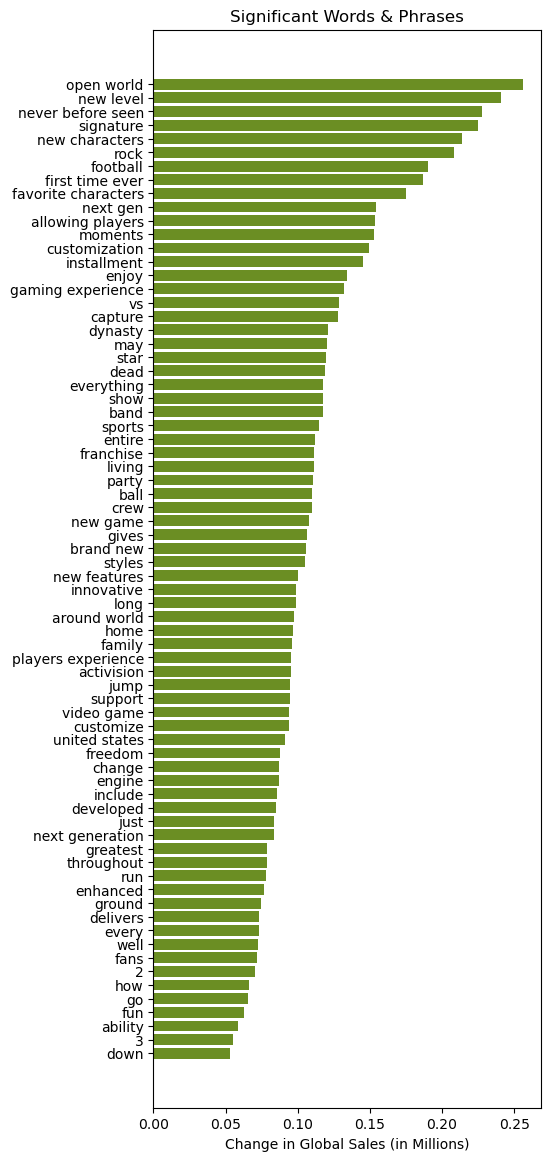

In [35]:
# plot significant words' effects. Positive first
plt.figure(figsize=(5, 14))
plt.barh(words_sig["word"][words_sig["difference"]>0],words_sig["difference"][words_sig["difference"]>0], \
         color="olivedrab")
plt.xlabel("Change in Global Sales (in Millions)")
plt.title("Significant Words & Phrases")

Text(0.5, 1.0, 'Significant Words & Phrases')

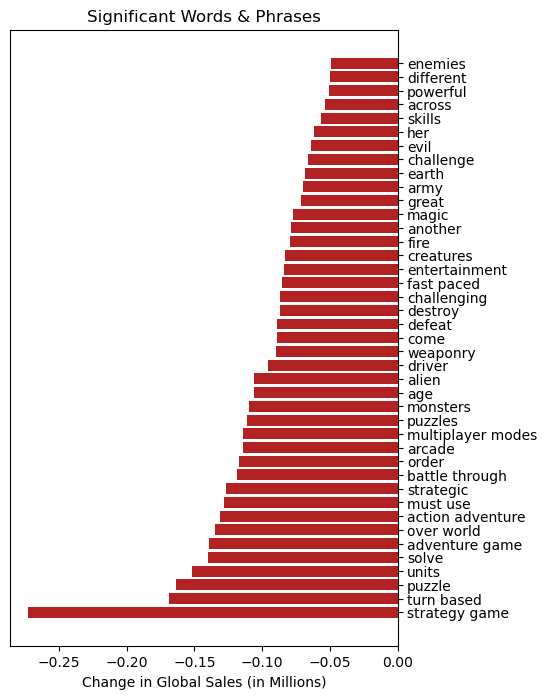

In [24]:
# now plot negative

f = plt.figure(figsize=(5, 8))
ax = f.add_subplot(111)
ax.yaxis.tick_right() # put ticks on rhs
ax=plt.barh(words_sig["word"][words_sig["difference"]<0],words_sig["difference"][words_sig["difference"]<0], \
         color="firebrick")
plt.xlabel("Change in Global Sales (in Millions)")
plt.title("Significant Words & Phrases")

### Create wordcloud of the most frequent words (not just the significant ones)

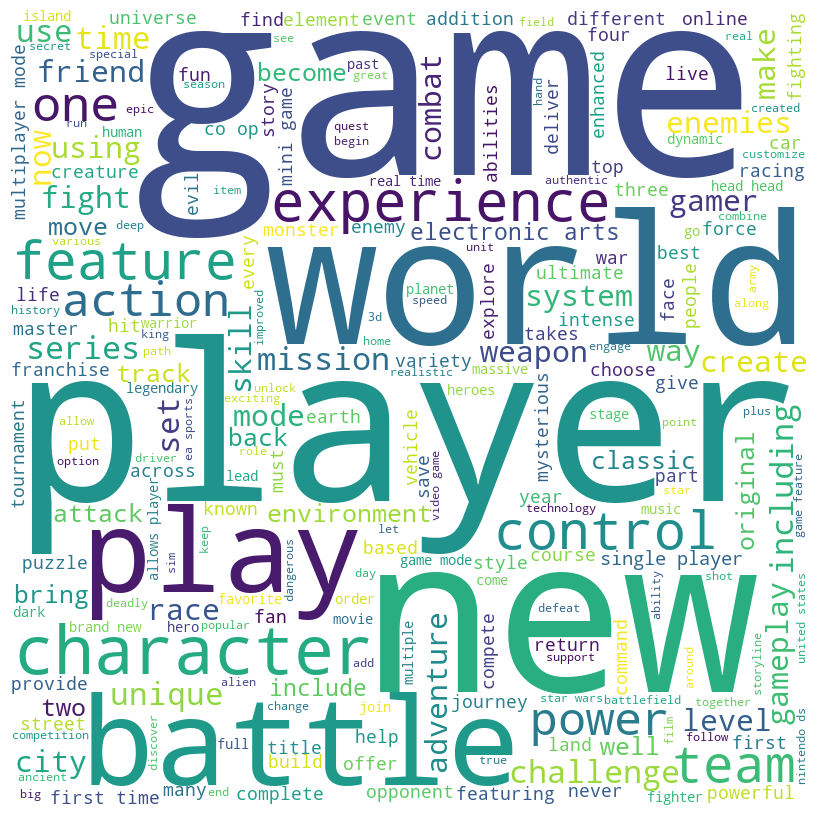

In [25]:
from wordcloud import WordCloud, STOPWORDS

# find the 500 most frequently used words
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', max_words=500,
                min_font_size = 10).generate(" ".join(df["summary"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Score summaries
Based on if they contained the good and bad words/phrases

In [26]:
# score each summary by the change in global sales of significant words/phrases in the summary
score = pd.DataFrame(df[["Name","Platform"]],columns = ["Name","Platform","score"]) # make new df
score["score"] = 0   # all summaries start with score of 0
for i in range(len(df)):
    for j in words_sig["word"]:
        if " "+j+" " in df["summary"][i]: # add leading and trailing spaces so it only finds whole words
            score["score"][i] += float(words_sig[words_sig["word"]==j]["difference"])

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_65507/1940263952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["score"][i] += float(words_sig[words_sig["word"]==j]["difference"])


In [27]:
# worst scores
score = score.sort_values("score") # sort by score
score.head()

,Name,Platform,score
3180,"The Chronicles of Narnia: The Lion, The Witch ...",PlayStation 2,-0.942554
3692,"The Chronicles of Narnia: The Lion, The Witch ...",DS,-0.942554
698,Psi-Ops: The Mindgate Conspiracy,Xbox,-0.728058
4456,Scarface: Money. Power. Respect.,PSP,-0.720561
2008,Worms,Xbox 360,-0.658228


In [28]:
# best scores
score.tail()

,Name,Platform,score
2119,LEGO Rock Band,PlayStation 3,1.288347
4191,Sonic Rivals 2,PSP,1.323538
204,Guitar Hero 5,Wii,1.890667
530,Guitar Hero 5,Xbox 360,1.890667
460,Guitar Hero 5,PlayStation 3,1.890667


### Worst scoring summary

In [29]:
worst = df[(df["Name"]==score["Name"].iloc[0]) & (df["Platform"]==score["Platform"].iloc[0])]
list(worst["summary"])

[' chronicles narnia  lion  witch wardrobe action adventure based disney walden media film capturing book series author c s  lewis  players enter world narnia  land frozen eternal winter evil powers malevolent evil white witch  order end frigid captivity free his people  mighty lion aslan  true ruler narnia  invokes ancient prophecy  become destiny four young siblings our world  peter  susan  edmund lucy pevensie work together use unique combat skills  weaponry abilities defeat witch her armies save narnia  these four unlikely heroes must battle evil forces white witch waging war against vast variety creatures  including centaurs  minotaurs  minoboars  cyclops  werewolves  wraiths  ankleslicers  wolves  satyrs  boggles more  battle evil forces white witch waging war against huge variety creatures  including centaurs  minotaurs  minoboars  cyclops  werewolves  wraiths  ankleslicers  wolves  satyrs  boggles more  utilize unique combat skills  weaponry special moves each character fight f

### Best scoring summary

In [30]:
best = df[(df["Name"]==score["Name"].iloc[-1]) & (df["Platform"]==score["Platform"].iloc[-1])]
list(best["summary"])

[' first time ever  players customize make band rocking any combination instruments game  whether two guitars two drums  three guitars microphone  any combination possible  allowing players experience music own way  brand new  innovative  easy use gameplay modes party play rockfest put fun  competition control center stage fans tailor guitar hero experience match personal style interests  extended hours entertainment  downloadable content guitar hero world tour compatible game automatically updated include upgrades enhancements guitar hero 5  guitar hero 5 features strongest  most varied set list date comprised master tracks 85 hottest bands today biggest classic acts including  kings leon  rolling stones  white stripes  santana  vampire weekend  tom petty  johnny cash  bob dylan  plus more 25 artists variety music genres making music video game debut  among first time ever features guitar hero 5  party play  players jump drop out gameplay seamlessly  rockfest  comprehensive competitiv